# Set up

In [2]:
# !pip install pandas numpy scipy scikit-learn scikit-learn-extra matplotlib
import os
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist, squareform, cdist

import matplotlib.pyplot as plt

In [7]:
# %% ------------------- Import data -------------------
# sep=';' and decimal='.'
price_where = pd.read_csv("prices_regions.csv", sep=";", decimal=".", header=0)
price_what  = pd.read_csv("prices_products.csv", sep=";", decimal=".", header=0, encoding = "unicode_escape")

In [8]:
price_when  = pd.read_csv("prices_months.csv",  sep=";", decimal=".", header=0, encoding = "unicode_escape")
price_when.head()

,Region,Product/service,01'2019,02'2019,03'2019,04'2019,05'2019,06'2019,07'2019,08'2019,09'2019,10'2019,11'2019,12'2019
0,DOLNOSLASKIE,apple juice,105.8,111.2,105.8,101.6,99.2,101.0,102.6,102.1,101.6,105.1,105.9,105.1
1,KUJAWSKO-POMORSKIE,apple juice,106.9,105.3,103.5,108.5,109.4,107.0,106.1,100.8,100.8,101.5,106.4,99.7
2,LODZKIE,apple juice,101.8,101.8,99.5,100.8,97.2,98.7,100.5,95.0,99.7,97.8,96.9,108.4
3,LUBELSKIE,apple juice,107.9,105.4,100.0,99.5,101.0,104.5,106.9,106.4,106.7,101.3,104.4,107.0
4,LUBUSKIE,apple juice,109.7,107.1,98.1,111.0,99.7,104.0,100.0,103.2,94.9,96.2,99.5,98.7


In [9]:
price_where.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 828 non-null    object 
 1   Product/service       828 non-null    object 
 2   DOLNOSLASKIE          828 non-null    float64
 3   KUJAWSKO-POMORSKIE    828 non-null    float64
 4   LODZKIE               828 non-null    float64
 5   LUBELSKIE             828 non-null    float64
 6   LUBUSKIE              828 non-null    float64
 7   MALOPOLSKIE           828 non-null    float64
 8   MAZOWIECKIE           828 non-null    float64
 9   OPOLSKIE              828 non-null    float64
 10  PODKARPACKIE          828 non-null    float64
 11  PODLASKIE             828 non-null    float64
 12  POMORSKIE             828 non-null    float64
 13  SLASKIE               828 non-null    float64
 14  SWIETOKRZYSKIE        828 non-null    float64
 15  WARMINSKO-MAZURSKIE  8

In [10]:
price_when.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           1040 non-null   object 
 1   Product/service  1040 non-null   object 
 2   01'2019          1040 non-null   float64
 3   02'2019          1040 non-null   float64
 4   03'2019          1040 non-null   float64
 5   04'2019          1040 non-null   float64
 6   05'2019          1040 non-null   float64
 7   06'2019          1040 non-null   float64
 8   07'2019          1040 non-null   float64
 9   08'2019          1040 non-null   float64
 10  09'2019          1040 non-null   float64
 11  10'2019          1040 non-null   float64
 12  11'2019          1040 non-null   float64
 13  12'2019          1040 non-null   float64
dtypes: float64(12), object(2)
memory usage: 113.9+ KB


In [11]:
price_what.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Region                                192 non-null    object 
 1   Month                                 192 non-null    object 
 2   rice                                  192 non-null    float64
 3   wheat roll                            192 non-null    float64
 4   wheat-rye bread                       192 non-null    float64
 5   wheat flour                           192 non-null    float64
 6   pearl-barley groats                   192 non-null    float64
 7   roast-beef                            192 non-null    float64
 8   beef meat                             192 non-null    float64
 9   pork                                  192 non-null    float64
 10  chicken                               192 non-null    float64
 11  pork ham           

In [12]:
print("price_where shape:", price_where.shape)
print("price_when  shape:", price_when.shape)
print("price_what  shape:", price_what.shape)

price_where shape: (828, 18)
price_when  shape: (1040, 14)
price_what  shape: (192, 68)


In [13]:
# %% ------------------- Extract label vectors & matrices -------------------
# price_when labels
region_when  = price_when.iloc[:, 0]             # first column
product_when = price_when.iloc[:, 1]             # second column
months_when  = price_when.columns[2:14]         
X_when       = price_when.iloc[:, 2:14].to_numpy(dtype=float)  # data only

In [14]:
pd.DataFrame(X_when).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,105.8,111.2,105.8,101.6,99.2,101.0,102.6,102.1,101.6,105.1,105.9,105.1
1,106.9,105.3,103.5,108.5,109.4,107.0,106.1,100.8,100.8,101.5,106.4,99.7
2,101.8,101.8,99.5,100.8,97.2,98.7,100.5,95.0,99.7,97.8,96.9,108.4
3,107.9,105.4,100.0,99.5,101.0,104.5,106.9,106.4,106.7,101.3,104.4,107.0
4,109.7,107.1,98.1,111.0,99.7,104.0,100.0,103.2,94.9,96.2,99.5,98.7


In [15]:
# price_what labels
region_what  = price_what.iloc[:, 0]
months_what  = price_what.iloc[:, 1]
product_what = price_what.columns[2:68]
X_what       = price_what.iloc[:, 2:68].to_numpy(dtype=float)

In [16]:
print("X_when shape:", X_when.shape)
print("X_what shape:", X_what.shape)

X_when shape: (1040, 12)
X_what shape: (192, 66)


# Helper functions

In [17]:
def plot_clusters_2d(X, labels, title="", centers=None):
    """
    PCA to 2D only for visualization.
    """
    pca = PCA(n_components=2, random_state=42)
    X2 = pca.fit_transform(X)
    plt.figure()
    scatter = plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=20)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    if centers is not None:
        C2 = pca.transform(centers)
        plt.scatter(C2[:, 0], C2[:, 1], marker='X', s=200, linewidths=2)
    plt.show()

In [18]:
def silhouette_plot(X, labels, metric="euclidean", title="Silhouette"):
    sil_avg = silhouette_score(X, labels, metric=metric)
    print(f"{title} — mean silhouette: {sil_avg:.3f}")
    # Optional simple bar plot of silhouette samples
    sample_sil = silhouette_samples(X, labels, metric=metric)
    order = np.argsort(sample_sil)
    plt.figure()
    plt.bar(range(len(sample_sil)), sample_sil[order])
    plt.title(f"{title} (avg={sil_avg:.3f})")
    plt.xlabel("Samples (sorted)")
    plt.ylabel("Silhouette")
    plt.show()

In [19]:
def print_cluster_object(name, labels, centers=None):
    print(f"\n=== {name} ===")
    print("cluster labels (first 20):", labels[:20])
    if centers is not None:
        print("centers shape:", centers.shape)

# Clustering


=== KMeans (Euclidean) on rows (k=3) ===
cluster labels (first 20): [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
centers shape: (3, 12)


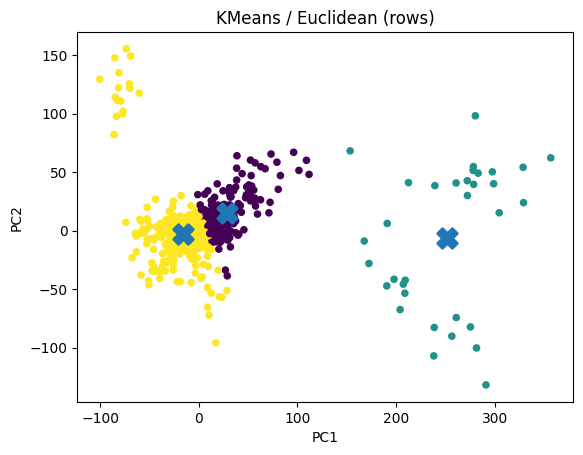

Silhouette: KMeans rows (Euclidean) — mean silhouette: 0.449


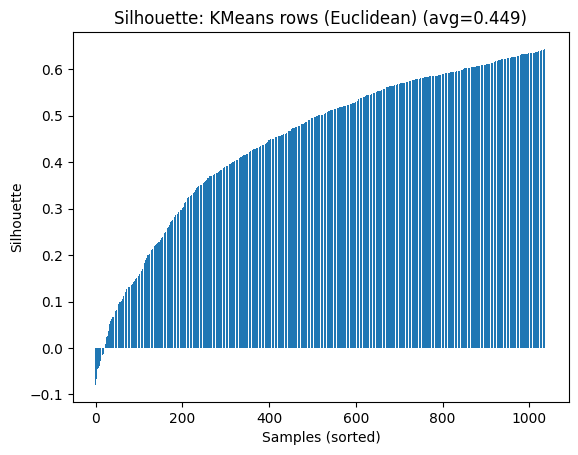

In [20]:
# 3) Clustering of dataset – by individual obs. (rows)
#    KMeans Euclidean, k=3
kmeans_rows = KMeans(n_clusters=3, n_init=20, random_state=42)
labels_rows = kmeans_rows.fit_predict(X_when)
print_cluster_object("KMeans (Euclidean) on rows (k=3)", labels_rows, kmeans_rows.cluster_centers_)
plot_clusters_2d(X_when, labels_rows, title="KMeans / Euclidean (rows)", centers=kmeans_rows.cluster_centers_)
silhouette_plot(X_when, labels_rows, metric="euclidean", title="Silhouette: KMeans rows (Euclidean)")


=== KMeans (Euclidean) on t(price_when)[,-x2] (k=3) ===
cluster labels (first 20): [2 2 2 1 1 1 1 1 0 0 0 0]
centers shape: (3, 1037)


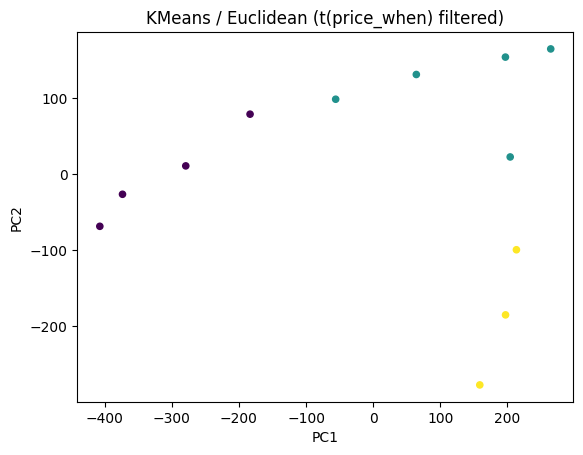

Silhouette: KMeans transpose (Euclidean) — mean silhouette: 0.354


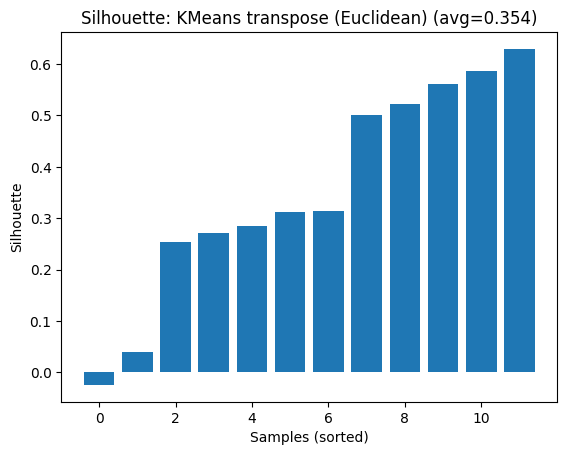


=== KMedoids (Manhattan) on t(price_when)[,-x2] (k=3) ===
cluster labels (first 20): [1 1 1 1 0 0 0 0 0 2 2 2]
centers shape: (3, 1037)


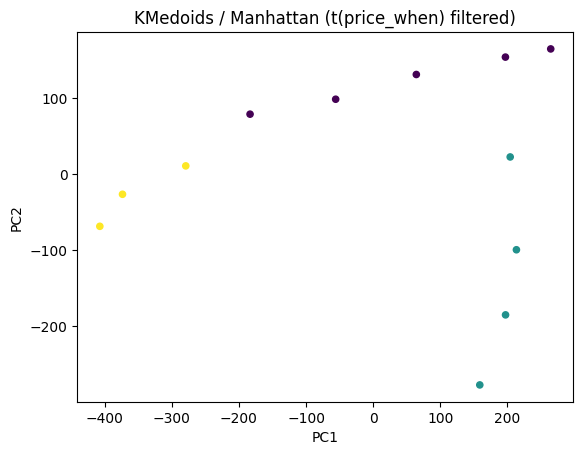

Silhouette: KMedoids transpose (Manhattan) — mean silhouette: 0.325


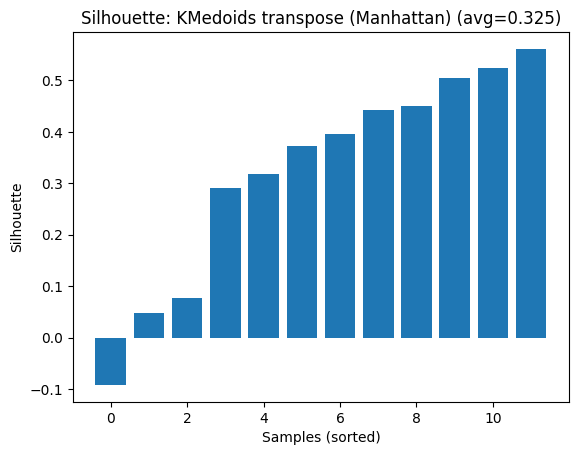

In [21]:
# 4) Clustering – by time (rows after transposition)
#    Compute std across 2019 & drop columns with zero std like your x2
# ------------------
X_when_T = X_when.T  # transpose
std_cols = X_when_T.std(axis=0, ddof=1)   # std per column (i.e., per product after transpose)
zero_std_mask = (std_cols == 0)
x2_idx = np.where(zero_std_mask)[0]
# print("\nColumns with zero std (no change in 2019):", x2_idx.tolist())

X_when_T_filt = X_when_T[:, ~zero_std_mask]  # drop zero-std columns

# KMeans (Euclidean, k=3) on transposed data (filtered)
kmeans_T_eu = KMeans(n_clusters=3, n_init=20, random_state=42)
labels_T_eu = kmeans_T_eu.fit_predict(X_when_T_filt)
print_cluster_object("KMeans (Euclidean) on t(price_when)[,-x2] (k=3)", labels_T_eu, kmeans_T_eu.cluster_centers_)
plot_clusters_2d(X_when_T_filt, labels_T_eu, title="KMeans / Euclidean (t(price_when) filtered)")
silhouette_plot(X_when_T_filt, labels_T_eu, metric="euclidean", title="Silhouette: KMeans transpose (Euclidean)")

# KMedoids with Manhattan (k=3) to mirror your “Manhattan” run
kmedoids_T_man = KMedoids(n_clusters=3, metric="manhattan", init="k-medoids++", random_state=42)
labels_T_man = kmedoids_T_man.fit_predict(X_when_T_filt)
print_cluster_object("KMedoids (Manhattan) on t(price_when)[,-x2] (k=3)", labels_T_man, kmedoids_T_man.cluster_centers_)
plot_clusters_2d(X_when_T_filt, labels_T_man, title="KMedoids / Manhattan (t(price_when) filtered)")
silhouette_plot(X_when_T_filt, labels_T_man, metric="manhattan", title="Silhouette: KMedoids transpose (Manhattan)")

Silhouette Score (Transpose + PCA): 0.478

=== KMeans (Euclidean) on t(price_when)[,-x2] and PCA (k=3) ===
cluster labels (first 20): [1 1 1 1 1 1 2 2 2 0 0 0]
centers shape: (3, 3)


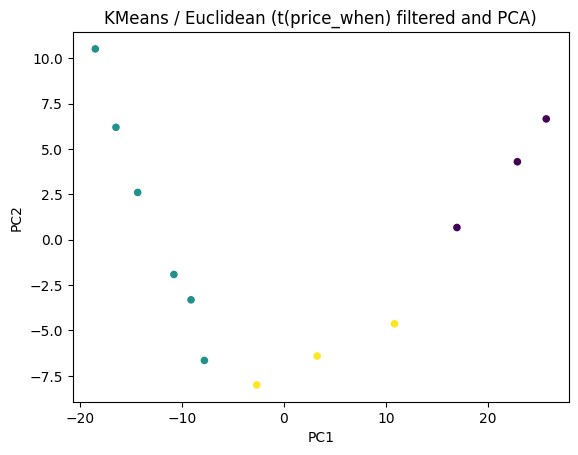

Silhouette: KMeans transpose and PCA (Euclidean) — mean silhouette: 0.478


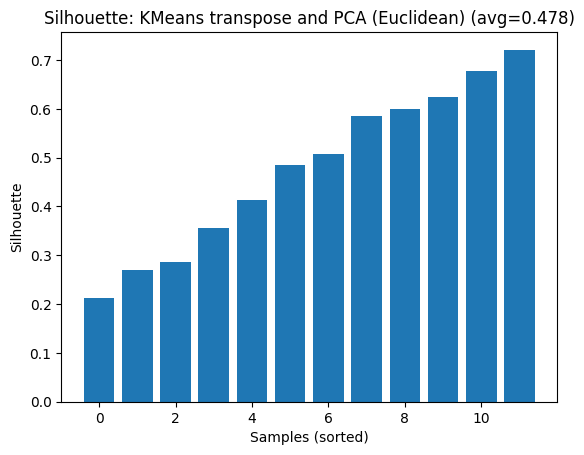

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Scale the data (features are now rows, so scale across columns=products)
#    We scale the *original* X_when_T_filt
scaler = StandardScaler()
X_when_T_scaled = scaler.fit_transform(X_when_T_filt.T).T 

# 2. Apply PCA to reduce the 1037 features
#    Try 3 components to match k=3 clusters
pca = PCA(n_components=3, random_state=42)
X_when_T_pca = pca.fit_transform(X_when_T_scaled)

# X_when_T_pca is now a clean (12, 3) array

# 3. Cluster this new, clean data
kmeans_T_pca = KMeans(n_clusters=3, n_init=20, random_state=42)
labels_T_pca = kmeans_T_pca.fit_predict(X_when_T_pca)

# 4. Check the new score!
from sklearn.metrics import silhouette_score
score_pca = silhouette_score(X_when_T_pca, labels_T_pca)
print(f"Silhouette Score (Transpose + PCA): {score_pca:.3f}")


print_cluster_object("KMeans (Euclidean) on t(price_when)[,-x2] and PCA (k=3)", labels_T_pca, kmeans_T_pca.cluster_centers_)
plot_clusters_2d(X_when_T_pca, labels_T_pca, title="KMeans / Euclidean (t(price_when) filtered and PCA)")
silhouette_plot(X_when_T_pca, labels_T_pca, metric="euclidean", title="Silhouette: KMeans transpose and PCA (Euclidean)")


=== KMeans (Euclidean) transpose k=4 ===
cluster labels (first 20): [2 2 2 0 0 0 3 3 3 1 1 1]
centers shape: (4, 1037)
Silhouette: KMeans transpose (k=4, Euclidean) — mean silhouette: 0.343


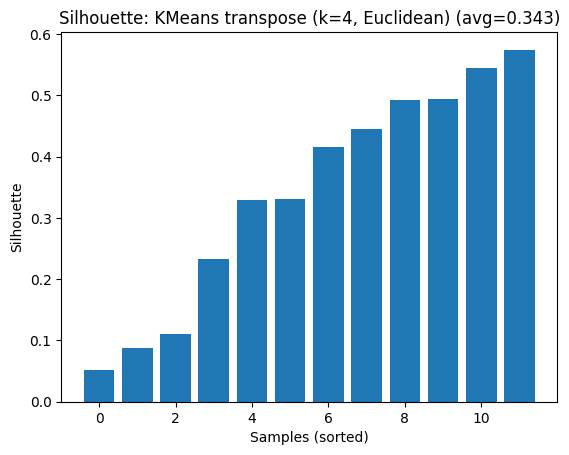


=== KMedoids (Manhattan) transpose k=4 ===
cluster labels (first 20): [1 1 1 3 3 0 0 0 0 2 2 2]
centers shape: (4, 1037)
Silhouette: KMedoids transpose (k=4, Manhattan) — mean silhouette: 0.286


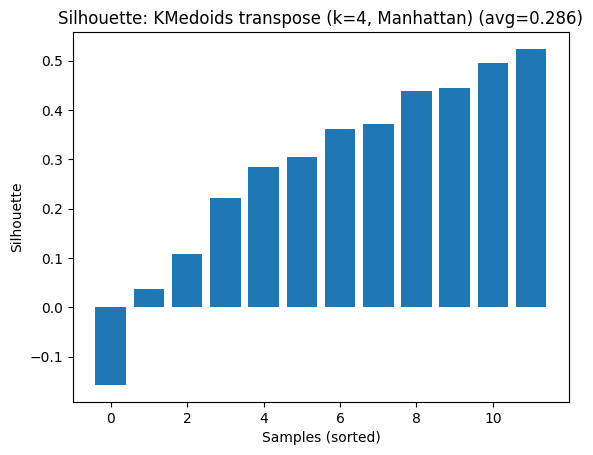

In [16]:
# 5) More runs with different k (k=4) and metrics
# ------------------
kmeans_T_eu4 = KMeans(n_clusters=4, n_init=20, random_state=42).fit(X_when_T_filt)
print_cluster_object("KMeans (Euclidean) transpose k=4", kmeans_T_eu4.labels_, kmeans_T_eu4.cluster_centers_)
silhouette_plot(X_when_T_filt, kmeans_T_eu4.labels_, metric="euclidean", title="Silhouette: KMeans transpose (k=4, Euclidean)")

kmedoids_T_man4 = KMedoids(n_clusters=4, metric="manhattan", init="k-medoids++", random_state=42).fit(X_when_T_filt)
print_cluster_object("KMedoids (Manhattan) transpose k=4", kmedoids_T_man4.labels_, kmedoids_T_man4.cluster_centers_)
silhouette_plot(X_when_T_filt, kmedoids_T_man4.labels_, metric="manhattan", title="Silhouette: KMedoids transpose (k=4, Manhattan)")

In [17]:
# 6) Inspect "clustering object" style info
# ------------------
print("\nAttributes (analogue) for KMedoids transpose (k=3):")
print("labels_ sample:", labels_T_man[:10])
print("cluster centers shape:", kmedoids_T_man.cluster_centers_.shape)


Attributes (analogue) for KMedoids transpose (k=3):
labels_ sample: [1 1 1 1 0 0 0 0 0 2]
cluster centers shape: (3, 1037)



=== KMeans price_what (rows) k=3 ===
cluster labels (first 20): [2 1 1 1 1 1 1 1 1 0 0 0 2 2 1 1 1 1 1 1]
centers shape: (3, 66)


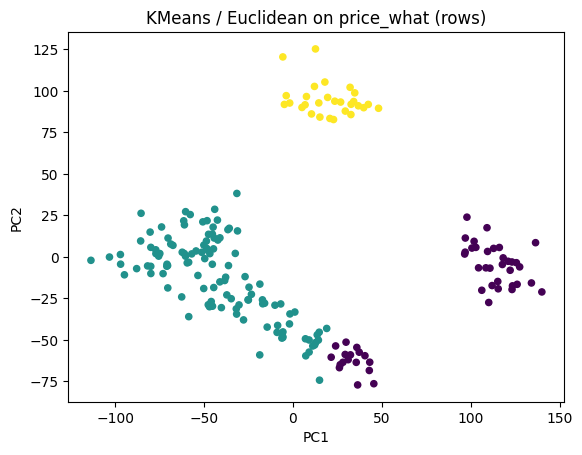


=== KMeans t(price_what) k=3 ===
cluster labels (first 20): [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
centers shape: (3, 192)


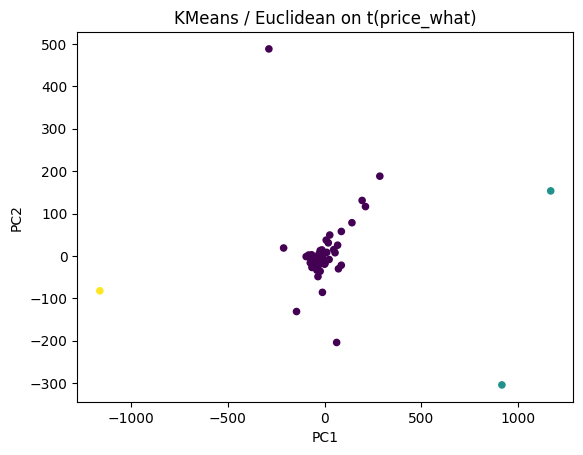


=== KMeans t(price_what)[-14,] k=3 ===
cluster labels (first 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
centers shape: (3, 192)


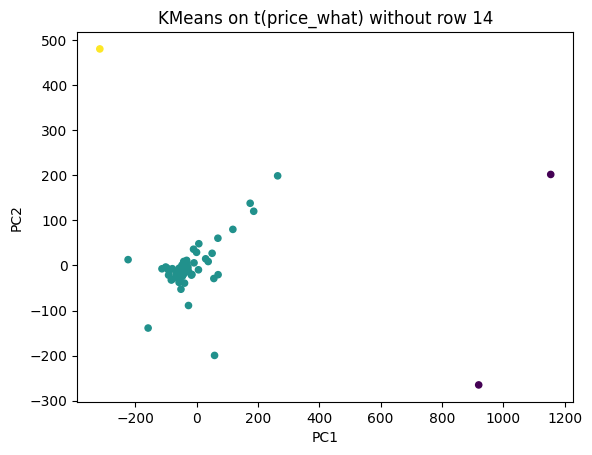

In [18]:
# 7) Clustering on other dataset price_what
# ------------------
# KMeans on price_what (rows = regions?, columns = products?)
kmeans_what_rows = KMeans(n_clusters=3, n_init=20, random_state=42).fit(X_what)
print_cluster_object("KMeans price_what (rows) k=3", kmeans_what_rows.labels_, kmeans_what_rows.cluster_centers_)
plot_clusters_2d(X_what, kmeans_what_rows.labels_, title="KMeans / Euclidean on price_what (rows)")

# KMeans on t(price_what)
X_what_T = X_what.T
kmeans_what_T = KMeans(n_clusters=3, n_init=20, random_state=42).fit(X_what_T)
print_cluster_object("KMeans t(price_what) k=3", kmeans_what_T.labels_, kmeans_what_T.cluster_centers_)
plot_clusters_2d(X_what_T, kmeans_what_T.labels_, title="KMeans / Euclidean on t(price_what)")

# "rownames(t(price_what)) # carp.fish in row 14 - outliers"
# In Python 0-based index, row 14 in R => index 13
idx_outlier = 13
if X_what_T.shape[0] > idx_outlier:
    X_what_T_no14 = np.delete(X_what_T, idx_outlier, axis=0)
    kmeans_what_T_no14 = KMeans(n_clusters=3, n_init=20, random_state=42).fit(X_what_T_no14)
    print_cluster_object("KMeans t(price_what)[-14,] k=3", kmeans_what_T_no14.labels_, kmeans_what_T_no14.cluster_centers_)
    plot_clusters_2d(X_what_T_no14, kmeans_what_T_no14.labels_, title="KMeans on t(price_what) without row 14")

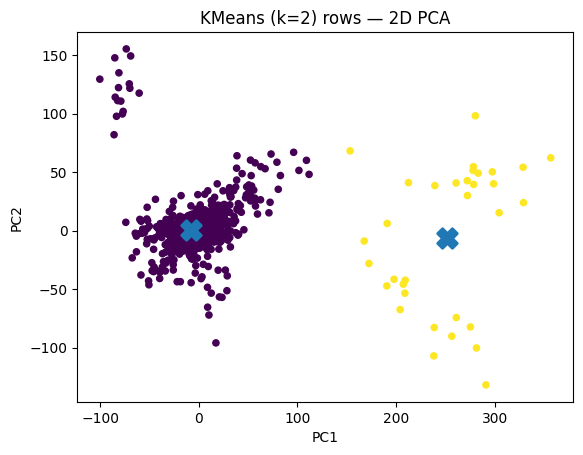

In [19]:
# 8) "stats::kmeans" + simple scatter and centers (R equivalent)
# ------------------
kmeans_simple = KMeans(n_clusters=2, n_init=20, random_state=42).fit(X_when)
labels_simple = kmeans_simple.labels_
centers_simple = kmeans_simple.cluster_centers_

# R's plot(price_when, col=cluster) only works for 2D; we project with PCA:
plot_clusters_2d(X_when, labels_simple, title="KMeans (k=2) rows — 2D PCA", centers=centers_simple)

In [20]:
# 9) Dissimilarity matrix (daisy/dist) + silhouette
# ------------------
# R: D <- dist(price_when, method="euclidean"); as.matrix(D)[1:5,1:5]
D_condensed = pdist(X_when, metric="euclidean")
D_square = squareform(D_condensed)
print("\nFirst 5x5 of distance matrix (Euclidean) on price_when:")
print(pd.DataFrame(D_square).iloc[:5, :5])


First 5x5 of distance matrix (Euclidean) on price_when:
           0          1          2          3          4
0   0.000000  16.908873  18.910050  13.224220  20.072618
1  16.908873   0.000000  24.023322  17.181676  17.437316
2  18.910050  24.023322   0.000000  19.762844  20.610192
3  13.224220  17.181676  19.762844   0.000000  21.445979
4  20.072618  17.437316  20.610192  21.445979   0.000000


Silhouette: KMeans (k=2) rows (Euclidean) — mean silhouette: 0.849


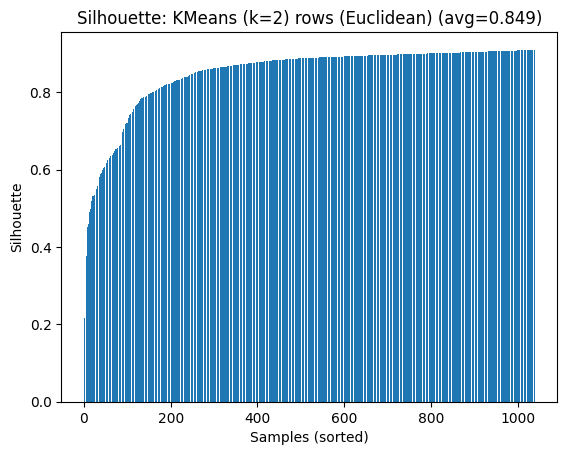

In [21]:
# Silhouette using precomputed distances (labels from kmeans_simple)
# sklearn silhouette_samples supports metric='precomputed' only for samples not average score;
# here we recompute via raw X for correctness.
silhouette_plot(X_when, labels_simple, metric="euclidean", title="Silhouette: KMeans (k=2) rows (Euclidean)")